<a href="https://colab.research.google.com/github/shyakx/Water_Quality_Model/blob/main/Water_Quality_Model_Steven_SHYAKA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


**1. LOAD THE DATA AND ALL IMPORTS**

In [2]:
#LOAD THE DATA AND ALL IMPORTS
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from matplotlib import pyplot
from tensorflow.keras import regularizers

# Load data
df = pd.read_csv("/content/water_potability.csv")

# Displaying the first few rows
df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


**2. CHECKING FOR THE MISSING VALUES IN DATASET**

As we have seen in the data there's alot of missing values let's see what those columns are and adjust the mean value to the missing values.

In [3]:
# Checking for missing values
print(df.isnull().sum())


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


**3. FILLING THE MISSING VALUES WITH COLUMN MEAN**

In [4]:
# Filling missing values with column means
df.fillna(df.mean(), inplace=True)

# Verifying no missing values remain
print(df.isnull().sum())


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


Plot the Data Appropriately

**3. IDENTIFYING THE FEATURES AND TARGET**

In [5]:
# Features (X) and Target (Y)
X = df.drop(columns=["Potability"])
Y = df["Potability"]


**4. SCALING THE FEATURES AND CONVERTING THEM BACK INTO DATAFRAME**

In [6]:
from sklearn.preprocessing import StandardScaler

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Converting back to DataFrame for readability
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


**5. DATA SPLITTING**

In [7]:
from sklearn.model_selection import train_test_split

# Splitting data into 70% training and 30%  (validation + test)
X_train, X_temp, Y_train, Y_temp = train_test_split(X_scaled, Y, test_size=0.3, random_state=42, stratify=Y)

# Splitting the temporary data into validation (15%) and testing (15%)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42, stratify=Y_temp)

# Printing the sizes of each dataset
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Testing set: {X_test.shape}")


Training set: (2293, 9), Validation set: (491, 9), Testing set: (492, 9)


**6. STEVEN'S MODEL**

In [8]:
#Model Definition by Steven
from tensorflow import keras

from tensorflow import keras
from tensorflow.keras import regularizers

# Model Definition with L2 Regularization
def steven_model(learning_rate=0.001, dropout_rate=0.3, l2_lambda=0.01):
    model = keras.Sequential([
        keras.layers.Input(shape=(9,)),  # Define input shape with 9 features
        keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)),
        keras.layers.Dropout(dropout_rate),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define class weights (increase weight for Class 1)
class_weights = {0: 1, 1: 2}

# Define training parameters
learning_rate = 0.001
dropout_rate = 0.2
l2_lambda = 0.005  # L2 regularization
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Explanation of Optimization Techniques

"""
L2 Regularization (0.01): Helps prevent overfitting by penalizing large weights.
Learning Rate (0.001): Ensures smooth convergence without large jumps.
Dropout Rate (0.3): Randomly disables 30% of neurons to prevent overfitting.
Early Stopping (patience=5): Stops training when validation loss stagnates for 5 epochs.
"""



'\nL2 Regularization (0.01): Helps prevent overfitting by penalizing large weights.\nLearning Rate (0.001): Ensures smooth convergence without large jumps.\nDropout Rate (0.3): Randomly disables 30% of neurons to prevent overfitting.\nEarly Stopping (patience=5): Stops training when validation loss stagnates for 5 epochs.\n'

7. MODEL CREATION, TRAINING, EVALUATION, PLOTING

Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.4986 - loss: 1.5213 - val_accuracy: 0.4033 - val_loss: 1.1255
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4650 - loss: 1.3364 - val_accuracy: 0.4033 - val_loss: 1.0084
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4574 - loss: 1.2252 - val_accuracy: 0.4155 - val_loss: 0.9361
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4667 - loss: 1.1426 - val_accuracy: 0.4318 - val_loss: 0.8781
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4836 - loss: 1.0849 - val_accuracy: 0.4358 - val_loss: 0.8435
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4725 - loss: 1.0455 - val_accuracy: 0.4684 - val_loss: 0.8103
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5249 - loss: 1.0056 - val_accuracy: 0.4827 - val_loss: 0.7945
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5216 - loss: 0.9969 - val_accuracy: 0.5234 - val_loss

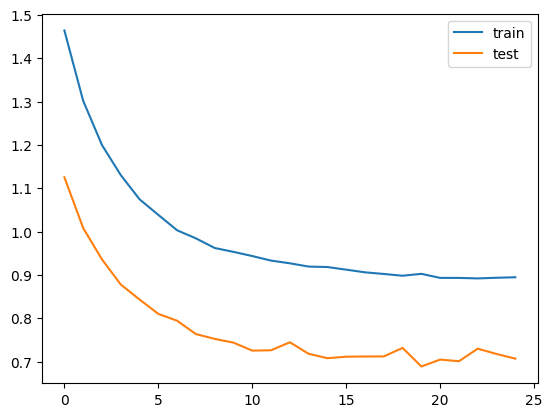

In [11]:

# Create and train the model
model = steven_model()
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50,
                    batch_size=32, class_weight=class_weights, callbacks=[early_stopping])

# evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)
print(classification_report(Y_test, y_pred))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()